In [1]:
#@title Mount data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#@title Code for loading the data
# import libraries 
#!pip install mtcnn
#!pip install patool
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import scipy.linalg as la
#from mtcnn import MTCNN
import patoolib

# utilities library
import cv2
import os

def crop_image(image_path):
    detector = MTCNN() 
    img=cv2.imread(image_path)
    data=detector.detect_faces(img)
    print(data)
    biggest=0
    if data !=[]:
        for faces in data:
            box=faces['box']            
            # calculate the area in the image
            area = box[3]  * box[3]
            if area>biggest:
                biggest=area
                bbox=box 
        bbox[0]= 0 if bbox[0]<0 else bbox[0]
        bbox[1]= 0 if bbox[1]<0 else bbox[1]
        img=img[bbox[1]: bbox[1]+bbox[3],bbox[0]: bbox[0]+ bbox[3]] 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert from bgr to rgb
        return (True, img) 
    else:
        return (False, None)

# Read the input image
#patoolib.extract_archive("drive/MyDrive/Labeled Faces in the Wild Home.rar")
data_path = "Labeled Faces in the Wild Home Focused"
data_dir_list = os.listdir(data_path)

img_data_list=[]
img_label = []
label_map = {}
i = 0

#set image size
img_size = 128,128

for dataset in data_dir_list:
  img_list=os.listdir(data_path + '/' + dataset)
  label_map[i] = str(dataset)

  for img in img_list:
        img_label.append(i)
        input_img=cv2.imread(data_path + '/' + dataset + '/' + img)
        status = True
        #status,input_img=crop_image(data_path + '/' + dataset + '/' + img)
        if status:
          input_img_resize=cv2.resize(input_img,img_size)
          # get color channel b, g, r
          b,g,r = cv2.split(input_img_resize)
          # switch it to r, g, b 
          input_img_rgb = cv2.merge([r,g,b])
          input_img_resize = cv2.cvtColor(input_img_rgb, cv2.COLOR_RGB2GRAY)
          img_data_list.append(input_img_resize)
        else:
          print('No facial image was detected')
  i += 1

img_data_list = np.array(img_data_list)
img_label = np.array(img_label)

def getlabel(id):
    return label_map[id]

In [9]:
# show the dimension of data and the label
img_data_list.shape, img_label.shape

((12773, 128, 128), (12773,))

In [10]:
img_data_list = np.array(img_data_list)
img_data_list = img_data_list.astype('float')
print(img_data_list)

[[[  7.   5.   9. ...  46.  37.  39.]
  [  9.   8.  13. ...  53.  44.  43.]
  [ 10.   9.  14. ...  52.  44.  43.]
  ...
  [242. 243. 239. ... 113. 112. 110.]
  [245. 242. 238. ... 113. 113. 111.]
  [242. 238. 234. ... 114. 116. 111.]]

 [[ 18.  20.  14. ... 137. 138. 136.]
  [ 25.  19.  10. ... 116. 115. 129.]
  [ 22.  17.   8. ... 111. 110. 122.]
  ...
  [ 28.  28.  24. ...  15.  20.  33.]
  [ 37.  34.  27. ...  23.  30.  46.]
  [ 50.  43.  32. ...  35.  44.  62.]]

 [[ 90.  87.  87. ...  86.  86.  88.]
  [ 92.  89.  88. ...  81.  83.  90.]
  [ 92.  89.  88. ...  76.  81.  91.]
  ...
  [ 88.  88.  87. ... 117. 113.  93.]
  [ 89.  88.  87. ... 136. 134. 108.]
  [ 88.  85.  83. ... 164. 160. 123.]]

 ...

 [[ 18.  20.  21. ... 125. 123. 121.]
  [ 15.  18.  21. ... 120. 121. 124.]
  [ 15.  18.  20. ... 115. 121. 126.]
  ...
  [ 29.  27.  24. ...   8.   9.  13.]
  [ 31.  29.  25. ...   7.   9.  13.]
  [ 32.  30.  26. ...   7.   9.  12.]]

 [[ 22.  18.  19. ...  88.  86.  96.]
  [ 18.  15.

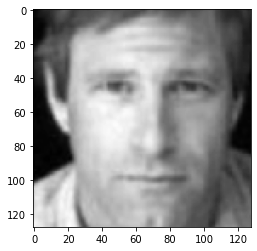

In [11]:
i = 0
plt.imshow(img_data_list[i], cmap='gray')

In [12]:
print(f"label of the #{i} image is : {img_label[i]}")
print(f"which is translated into : {getlabel(img_label[i])}")

label of the #0 image is : 0
which is translated into : Aaron_Eckhart


In [13]:
#Creating Image Matrix
#import pandas as pd

#df = {}
array = []
i = 0

while(i!=img_data_list.shape[0]):
  #df[i] = pd.DataFrame(img_data_list[i].flatten()).T
  #array.append(df[i])
  a = pd.DataFrame(img_data_list[i].flatten()).T
  array.append(a)
  i+=1
df = pd.concat(array,ignore_index=True)
df
#df.to_excel("faces.xlsx")

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,7.0,5.0,9.0,17.0,26.0,33.0,40.0,43.0,43.0,43.0,...,139.0,134.0,115.0,110.0,107.0,108.0,111.0,114.0,116.0,111.0
1,18.0,20.0,14.0,6.0,7.0,15.0,21.0,15.0,8.0,11.0,...,16.0,15.0,14.0,13.0,12.0,20.0,27.0,35.0,44.0,62.0
2,90.0,87.0,87.0,88.0,89.0,88.0,88.0,86.0,86.0,85.0,...,77.0,79.0,98.0,113.0,129.0,156.0,162.0,164.0,160.0,123.0
3,102.0,83.0,68.0,57.0,57.0,61.0,66.0,60.0,48.0,33.0,...,251.0,252.0,253.0,253.0,253.0,254.0,254.0,254.0,253.0,253.0
4,83.0,80.0,77.0,74.0,70.0,65.0,63.0,69.0,71.0,73.0,...,230.0,233.0,239.0,241.0,242.0,248.0,250.0,251.0,253.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12768,193.0,193.0,193.0,195.0,195.0,198.0,201.0,204.0,202.0,201.0,...,231.0,232.0,235.0,235.0,236.0,238.0,238.0,238.0,239.0,239.0
12769,254.0,253.0,246.0,253.0,250.0,245.0,237.0,227.0,221.0,218.0,...,235.0,236.0,236.0,236.0,236.0,238.0,238.0,238.0,238.0,238.0
12770,18.0,20.0,21.0,25.0,28.0,28.0,24.0,17.0,11.0,8.0,...,5.0,4.0,2.0,2.0,2.0,5.0,7.0,7.0,9.0,12.0
12771,22.0,18.0,19.0,19.0,19.0,18.0,17.0,17.0,18.0,20.0,...,247.0,238.0,203.0,196.0,194.0,209.0,214.0,219.0,224.0,237.0


In [ ]:
#Find Mean Matrix Image
df_mean = np.array(df.mean()).reshape(img_size)
plt.imshow(df_mean, cmap='gray')
df_mean = pd.DataFrame(df_mean)

In [ ]:
mean_vec = np.mean(df, axis=0)
mean_vec

In [ ]:
selisih = df - mean_vec
selisih

In [ ]:
selisih = np.array(selisih)
print(selisih)

In [ ]:
C = selisih.dot(selisih.T)
C

In [ ]:
[nilai,vektor] = la.eig(C)

In [ ]:
vektor = vektor.T
print(nilai)
print(vektor)
sort = nilai.argsort()[::-1]
nilai = nilai[sort]
vektor = vektor[sort,:]

In [ ]:
print('nilai =',nilai[0],', vektor =',vektor[0])
print(np.matmul(C,vektor[0]),'=',nilai[0]*vektor[0])
print('nilai =',nilai[1],', vektor =',vektor[1])
print(np.matmul(C,vektor[1]),'=',nilai[1]*vektor[1])
print('nilai =',nilai[2],', vektor =',vektor[2])
print(np.matmul(C,vektor[2]),'=',nilai[2]*vektor[2])
print('nilai =',nilai[3],', vektor =',vektor[3])
print(np.matmul(C,vektor[3]),'=',nilai[3]*vektor[3])
print('nilai =',nilai[4],', vektor =',vektor[4])
print(np.matmul(C,vektor[4]),'=',nilai[4]*vektor[4])
print('nilai =',nilai[5],', vektor =',vektor[5])
print(np.matmul(C,vektor[5]),'=',nilai[5]*vektor[5])

In [ ]:
nilai = np.delete(nilai, [-1])
vektor = np.delete(vektor, [-1],0)
print(nilai)
print(vektor)

In [ ]:
vektor0=np.matmul(selisih.T,vektor[0])
vektor1=np.matmul(selisih.T,vektor[1])
vektor2=np.matmul(selisih.T,vektor[2])
vektor3=np.matmul(selisih.T,vektor[3])
vektor4=np.matmul(selisih.T,vektor[4])
vektor=np.vstack((vektor0,vektor1,vektor2,vektor3,vektor4))
print(vektor)
df=pd.DataFrame(vektor)

In [ ]:
vektor[0]=vektor[0]/np.linalg.norm(vektor[0])
vektor[1]=vektor[1]/np.linalg.norm(vektor[1])
vektor[2]=vektor[2]/np.linalg.norm(vektor[2])
vektor[3]=vektor[3]/np.linalg.norm(vektor[3])
vektor[4]=vektor[4]/np.linalg.norm(vektor[4])
print(vektor)

In [ ]:
from numpy import linalg as LA
print(LA.norm(vektor[0]))
print(LA.norm(vektor[1]))
print(LA.norm(vektor[2]))
print(LA.norm(vektor[3]))
print(LA.norm(vektor[4]))

In [ ]:
W0=np.matmul(vektor[0].T,selisih[0])
W1=np.matmul(vektor[1].T,selisih[0])
W2=np.matmul(vektor[2].T,selisih[0])
W3=np.matmul(vektor[3].T,selisih[0])
W4=np.matmul(vektor[4].T,selisih[0])
print(W0)
print(W1)
print(W2)
print(W3)
print(W4)

In [ ]:
projected=mean_vec+W0*vektor[0]+W1*vektor[1]+W2*vektor[2]+W3*vektor[3]+W4*vektor[4]
projected=np.array(projected).reshape(128,128)
plt.imshow(projected, cmap='gray')